In [ ]:
# KUNSKAPKONTROLL 3 


In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import data
housing_original = pd.read_csv('housing.csv')
housing_original.head()
housing_original.info()
housing_original.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [ ]:
# removing irrelevant data
# null values in rows and columns

In [21]:
housing = housing_original.dropna()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [25]:
# empty value control
housing[housing.isnull().any(axis=1)]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

Text(0.5, 0.98, 'Value Distribution in Columns (Without Coordinates)')

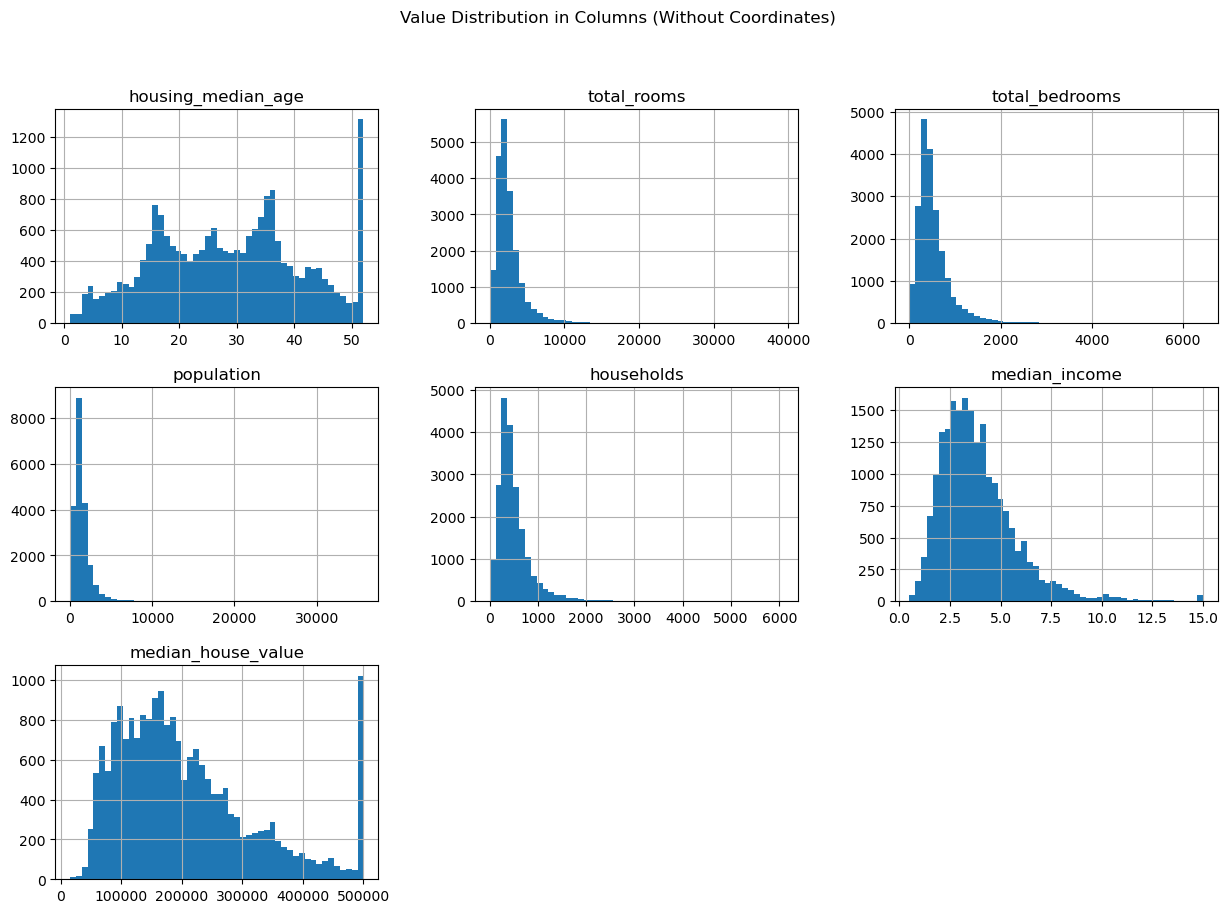

In [67]:
# coordinates do not carry any semantic load, remove them from the data relevance analysis
housing_without_coordinates = housing.drop(columns=['longitude', 'latitude'])

housing_without_coordinates.hist(bins=50, figsize=(15, 10))
plt.suptitle("Value Distribution in Columns (Without Coordinates)")

In [145]:
# Calculate the mean and standard deviation
mean_pop = housing['population'].mean()
std_pop = housing['population'].std()
print(f'\nmean {mean_pop} and standard {std_pop} deviation  ')

# population data outlier 
lower_bound = mean_pop - 3 * std_pop
upper_bound = mean_pop + 3 * std_pop
print(f'\npopulation data outlier boundaries from {lower_bound} to {upper_bound}')

# Finding rows with outliers
outliers = housing[(housing['population'] < lower_bound) | (housing['population'] > upper_bound)]

print(f"population data outlier : {outliers.shape[0]}")
outliers



mean 1424.9469485635982 and standard 1133.2084897449563 deviation  

population data outlier boundaries from -1974.6785206712707 to 4824.572417798467
population data outlier : 339


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
283      -122.16     37.79                  22        12842          2048.0   
570      -122.24     37.72                   5        18634          2885.0   
576      -122.06     37.77                  12        14316          2045.0   
780      -122.10     37.63                  18         9963          2031.0   
799      -122.07     37.64                  22         5861          1516.0   
...          ...       ...                 ...          ...             ...   
20529    -121.78     38.55                  12        10509          2186.0   
20530    -121.76     38.57                  11        15018          3008.0   
20544    -121.76     38.55                  23         8800          1857.0   
20563    -121.75     38.67                   9        12139          2640.0   
20629    -121.39     39.12                  28        10035          1856.0   

       population  households  median_income  median_house_value  \
283          4985        1967         5.9849              371000   
570          7427        2718         7.6110              350700   
576          5781        2007         7.2634              341600   
780          5613        1946         3.8171              187200   
799          5436        1463         2.5158              134900   
...           ...         ...            ...                 ...   
20529        5633        2138         2.9605              204300   
20530        7984        2962         3.1371              201800   
20544        6330        1832         2.0650              219400   
20563        6837        2358         3.1250              132500   
20629        6912        1818         2.0943              108300   

      ocean_proximity  ocean_proximity_encoded  median_house_value_rounded  \
283          NEAR BAY                        3                    400000.0   
570          NEAR BAY                        3                    400000.0   
576          NEAR BAY                        3                    300000.0   
780          NEAR BAY                        3                    200000.0   
799          NEAR BAY                        3                    100000.0   
...               ...                      ...                         ...   
20529          INLAND                        1                    200000.0   
20530          INLAND                        1                    200000.0   
20544          INLAND                        1                    200000.0   
20563          INLAND                        1                    100000.0   
20629          INLAND                        1                    100000.0   

       rooms_to_bedrooms  
283             6.270508  
570             6.458925  
576             7.000489  
780             4.905465  
799             3.866095  
...                  ...  
20529           4.807411  
20530           4.992686  
20544           4.738826  
20563           4.598106  
20629           5.406789  

[339 rows x 13 columns]

Text(0.5, 1.0, 'Boxplot of Housing Data')

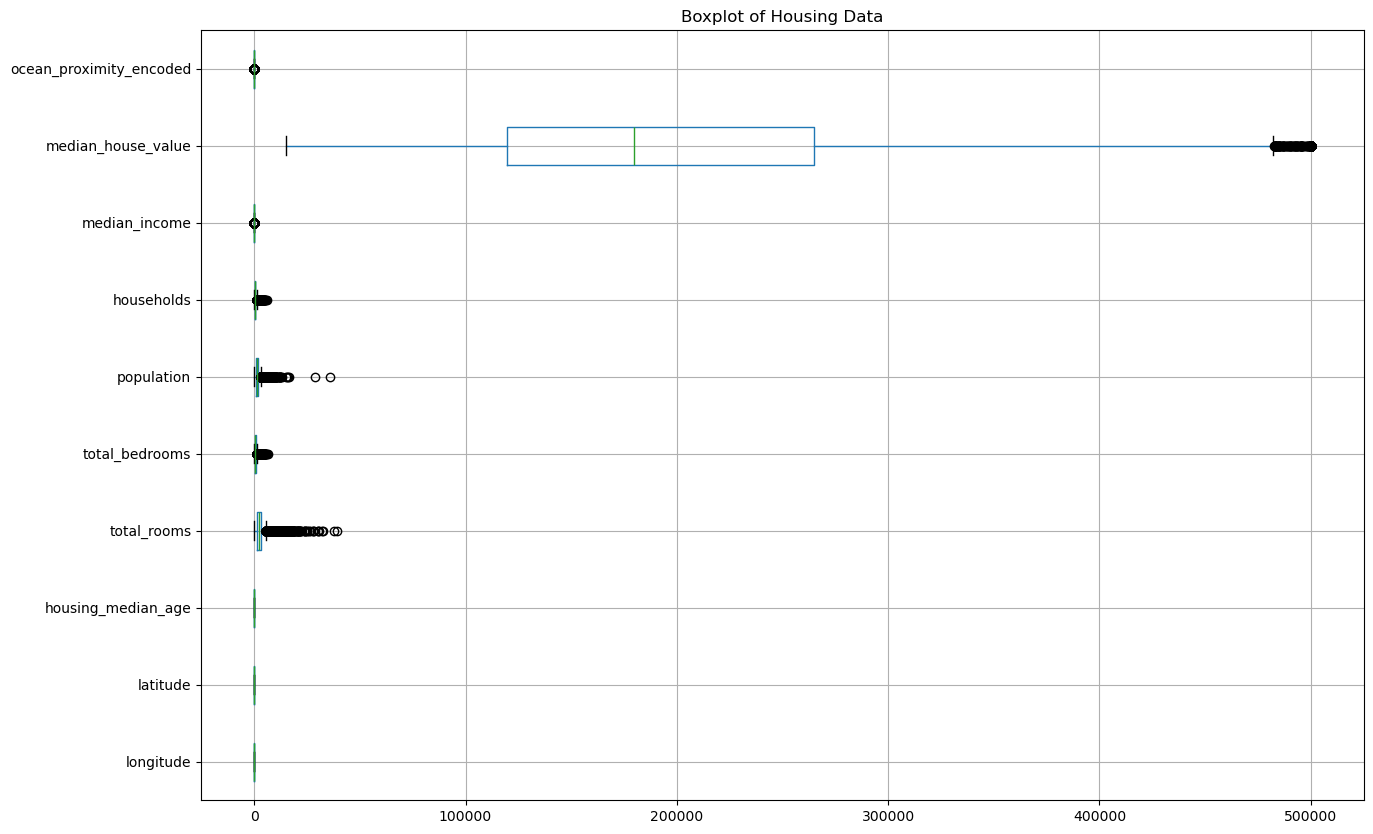

In [114]:
housing.boxplot(figsize=(15, 10), vert=False)
plt.title("Boxplot of Housing Data")

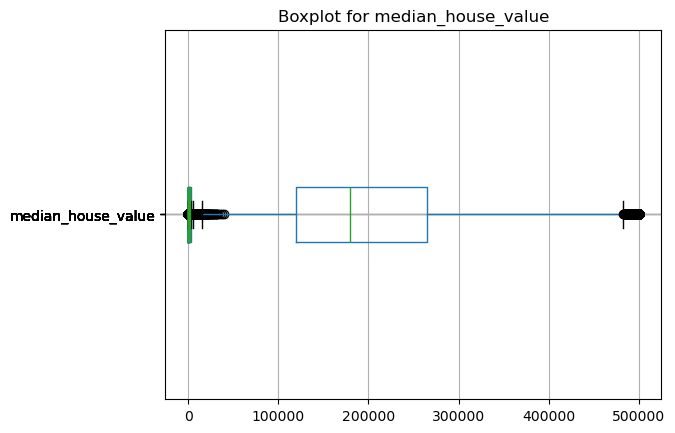

In [56]:
for column in housing.select_dtypes(include=['float64', 'int64']):
    housing.boxplot(column=column, vert=False)
    plt.title(f"Boxplot for {column}")

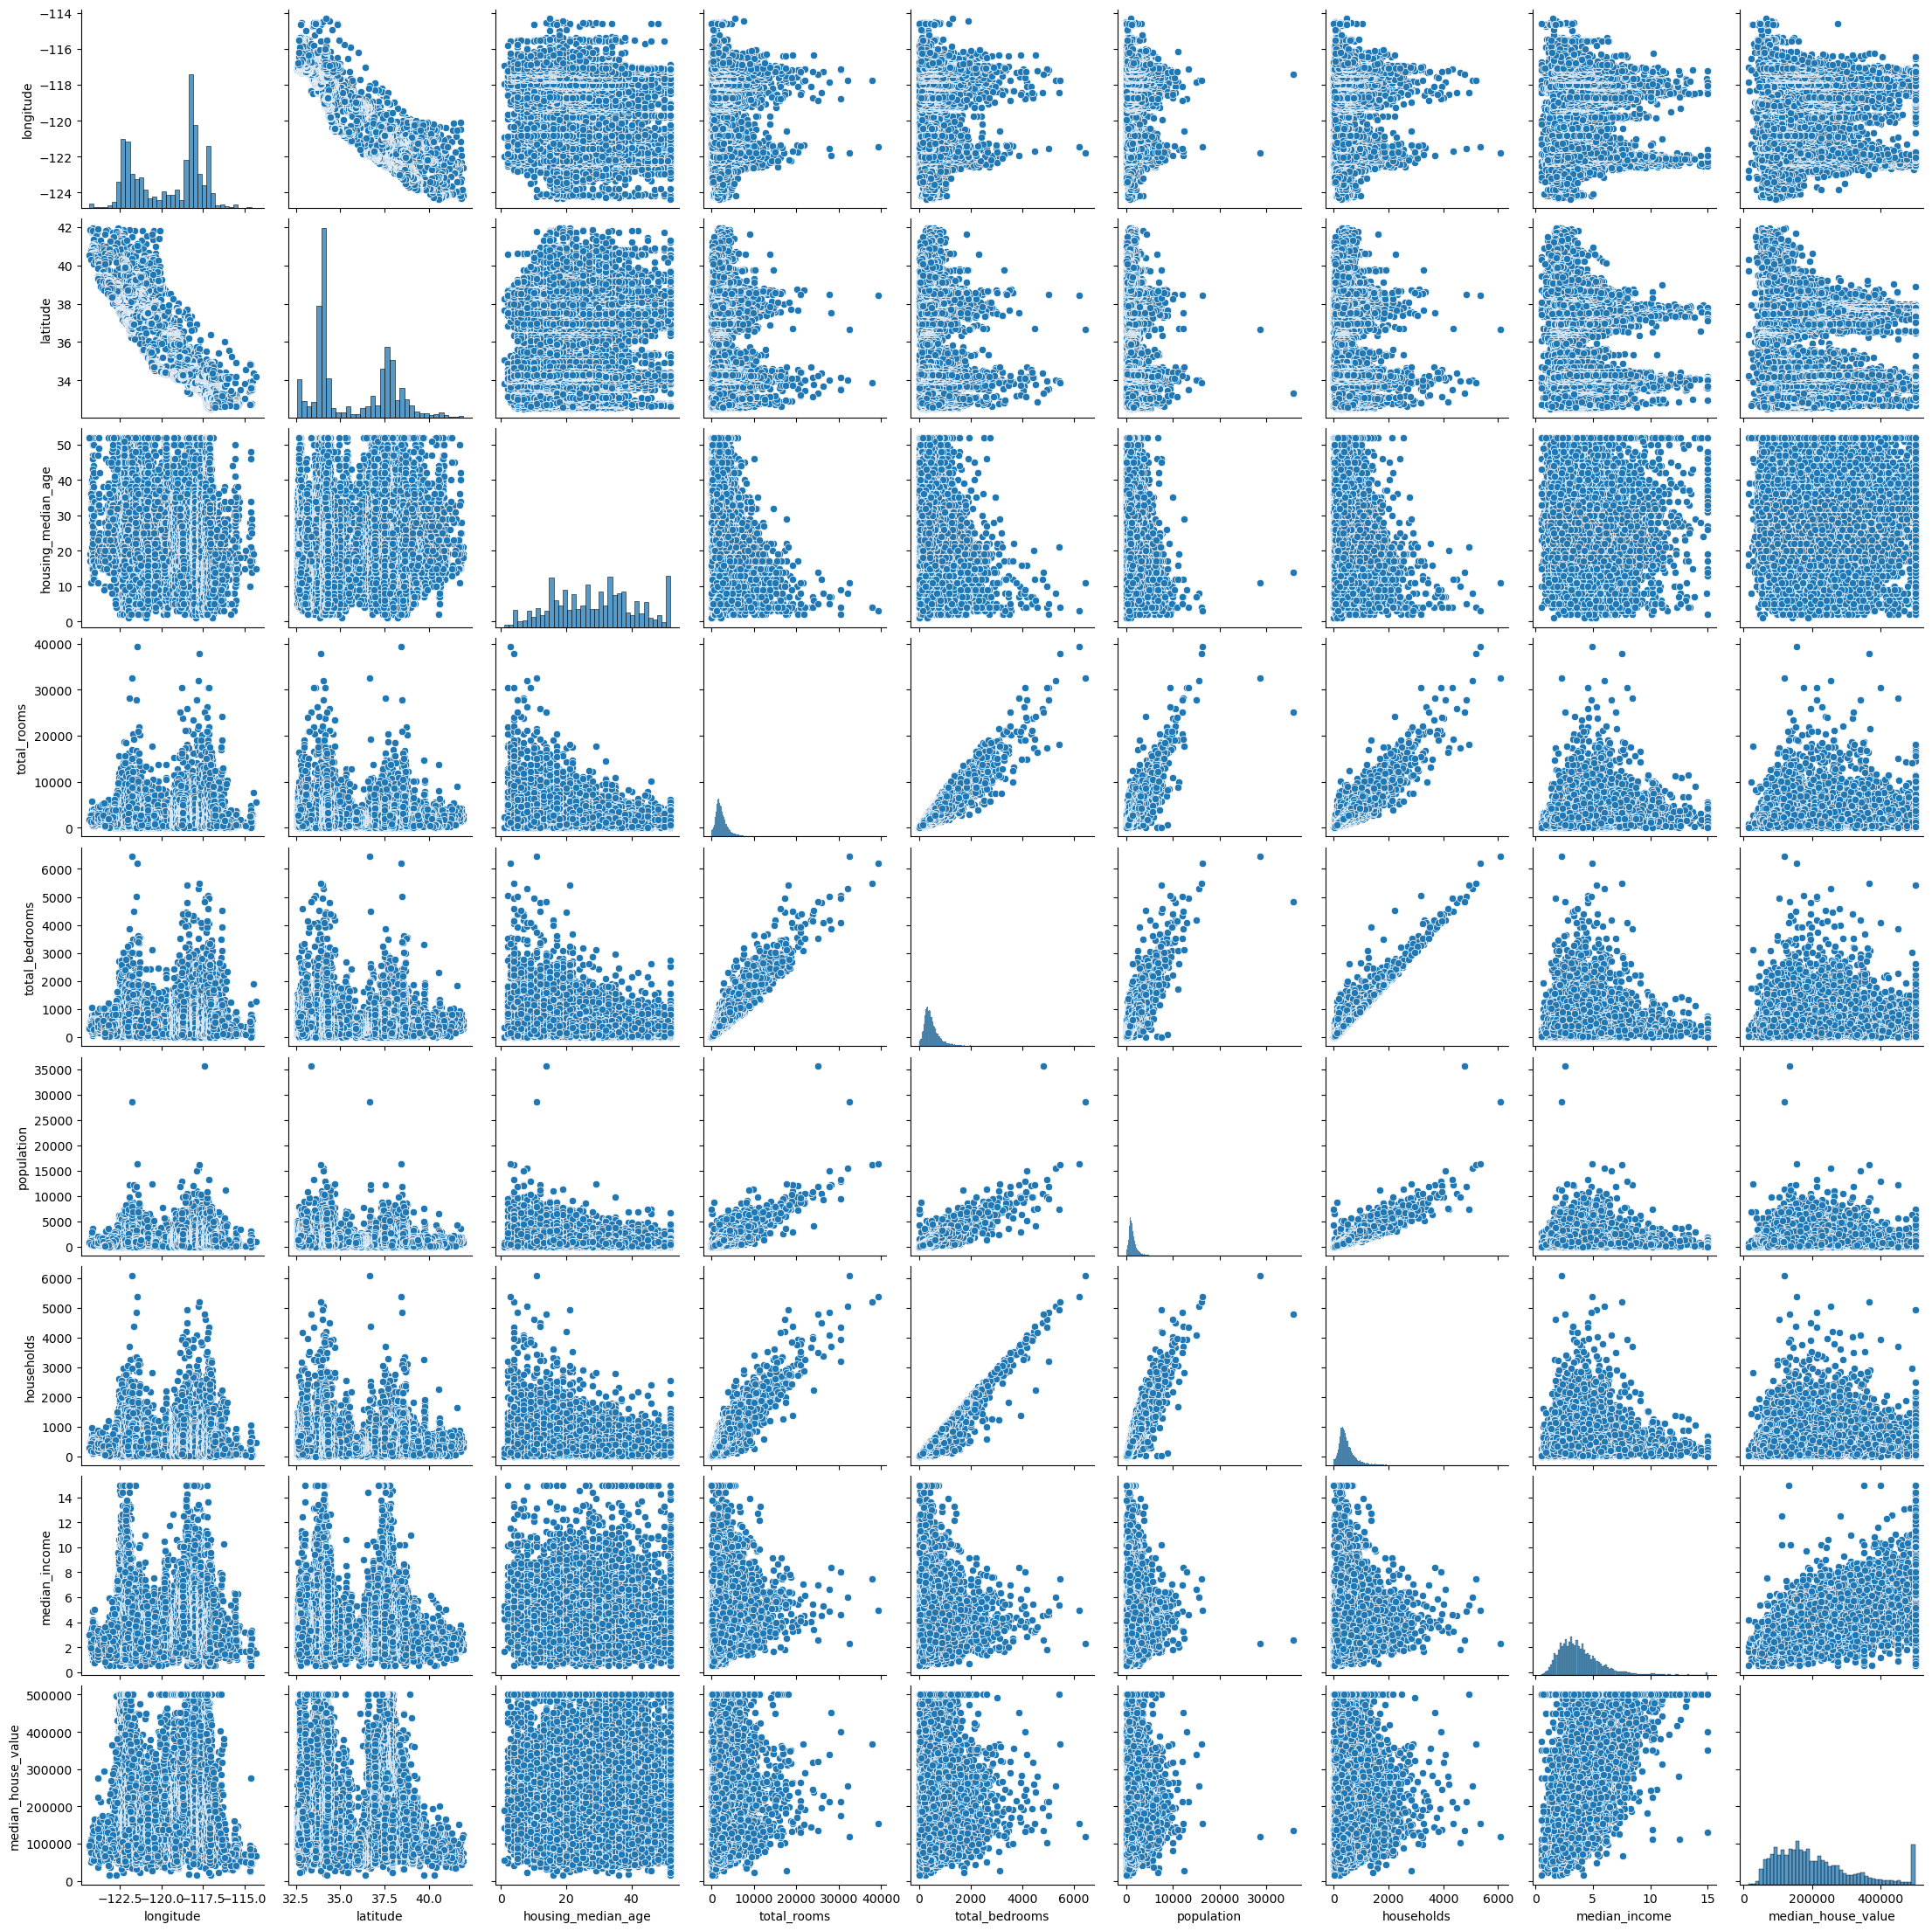

In [40]:
import seaborn as sns

sns.pairplot(housing, diag_kind="hist")


Text(0.5, 1.0, 'Scatter Plot: Income vs House Value')

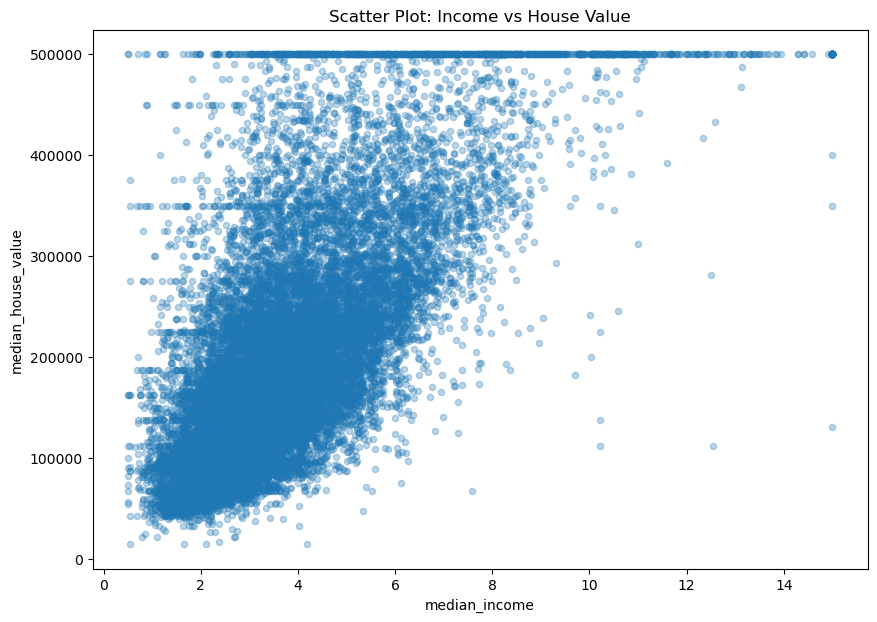

In [60]:
housing_original.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3, figsize=(10, 7))
plt.title("Scatter Plot: Income vs House Value")

In [136]:
# Round values in the median_house_value column to the nearest 100,000
#housing['median_house_value_rounded'] = (housing['median_house_value'] / 100000).round() * 100000
housing.loc[:, 'median_house_value_rounded'] = (housing['median_house_value'] / 100000).round() * 100000

# Count the number of unique values with rounding
value_counts = housing['median_house_value_rounded'].value_counts()

print(value_counts)

median_house_value_rounded
100000.0    7280
200000.0    7229
300000.0    3090
400000.0    1381
500000.0    1247
0.0          206
Name: count, dtype: int64


Text(0.5, 1.0, 'Correlation Heatmap')

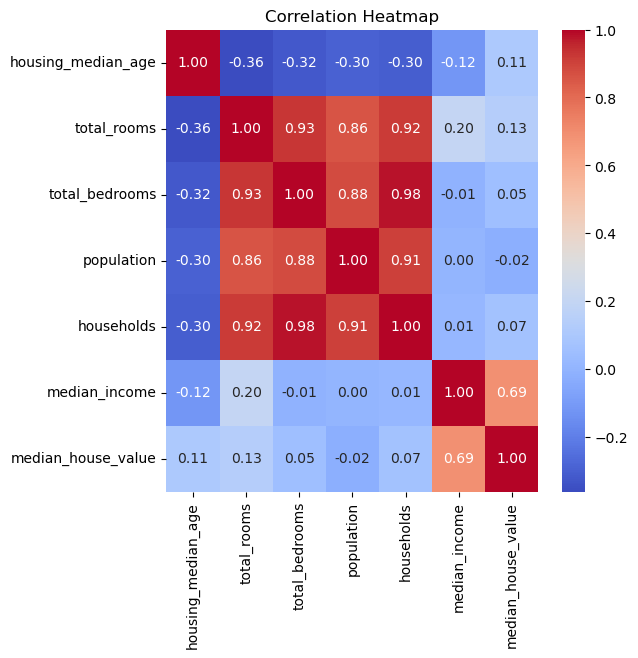

In [54]:
# check the correlation between the digital columns except for the coordinates
numerical_columns = housing_original.select_dtypes(include=['float64', 'int64']).drop(['longitude', 'latitude'], axis=1)

corr_matrix = numerical_columns.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")

Text(0, 0.5, 'Longitude')

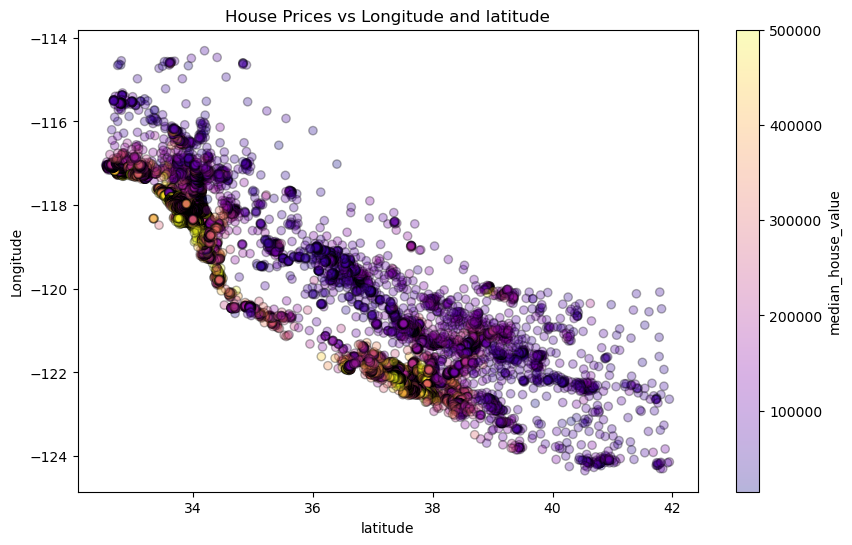

In [128]:
colors = housing['median_house_value']

# scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=housing['latitude'],  
    y=housing['longitude'],          
    c=colors,                        
    cmap='plasma',                  
    alpha=0.3,                       
    edgecolor='k'
)

plt.colorbar(scatter, label='median_house_value')
plt.title("House Prices vs Longitude and latitude")
plt.xlabel("latitude")
plt.ylabel("Longitude")

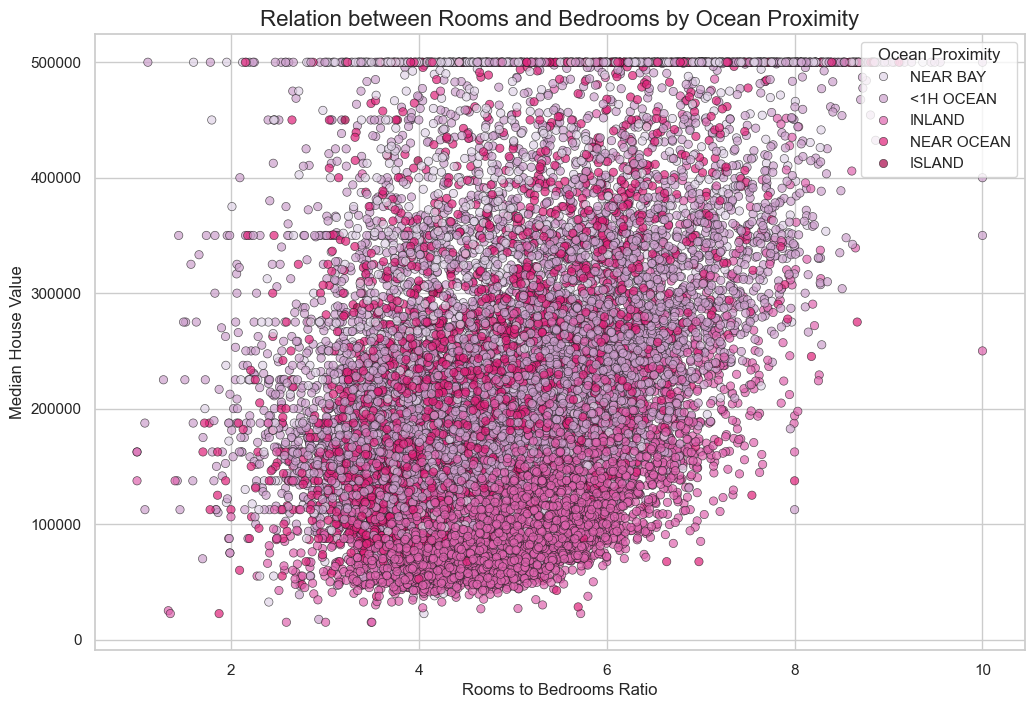

In [143]:
# Calculate the ratio of the number of rooms to the number of bedrooms
housing.loc[:, 'rooms_to_bedrooms'] = housing['total_rooms'] / housing['total_bedrooms']

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='rooms_to_bedrooms',          
    y='median_house_value',         
    hue='ocean_proximity',          
    data=housing,                   
    palette='PuRd',              
    alpha=0.7,                      
    edgecolor='k'                   
)

plt.title("Relation between Rooms and Bedrooms by Ocean Proximity", fontsize=16)
plt.xlabel("Rooms to Bedrooms Ratio", fontsize=12)
plt.ylabel("Median House Value", fontsize=12)

plt.legend(title='Ocean Proximity', loc='upper right')



In [ ]:
# Conclusions:
# The input data contains some anomalous data:
# - outliers in the population column,
# - the number of houses with a median price of 500,000 independent of the median incomst.
# The ratio of the number of bedrooms to rooms does not greatly affect the price
# The obvious conclusion is that houses are more expensive near the ocean coast. :)


In [ ]:
#1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det? 

# Det var svårt för mig hittills bara på grund av min hälsa jag var sjuk i mer än 2 veckor.
# Arbetsuppgifterna i sig är intressanta, även om jag lägger ner mycket tid på att läsa hjälp och söka på Google. 
# Men när man lär sig något nytt händer detta alltid.

In [ ]:
# 2. Vilket betyg anser du att du ska ha och varför? 

# Godkänt.
# För jag lyckades. Jag förstod principerna för att arbeta med data med hjälp av nya verktyg. 
# Och jag har redan blivit kär i Python, även om jag förstår att det fortfarande är en lång väg kvar.

In [ ]:
# 3. Något du vill lyfta fram till Antonio? 

# Som jag förstår det ligger tyngdpunkten på självständigt arbete, 
# men jag skulle vilja att förklaringar till kunskapskontrollen lämnas innan själva provstarten.